<a href="https://colab.research.google.com/github/EdwSanA/DPro_Tareas/blob/main/Matriz_bidimensional_y_gradiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[P1] x.shape=(1001,), y.shape=(1001,)
[P2] xy_array.shape=(1001, 2)  (esperado: (1001, 2))
[P3] gradient.shape=(1000,)  (esperado: (1000,))  ejemplo grad=12.000000000000284


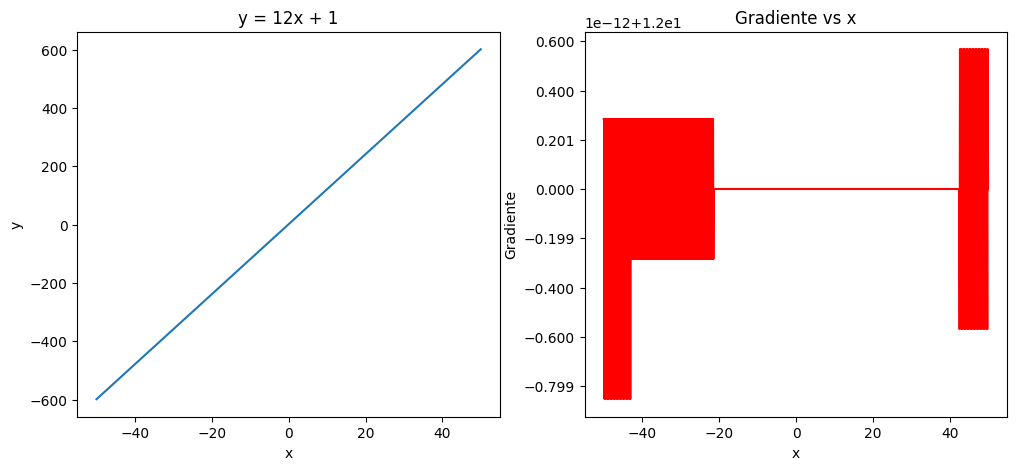

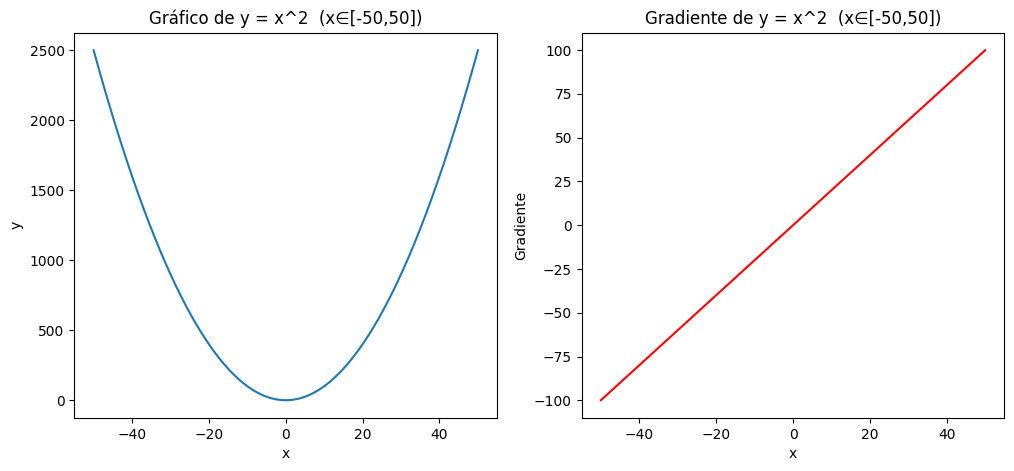

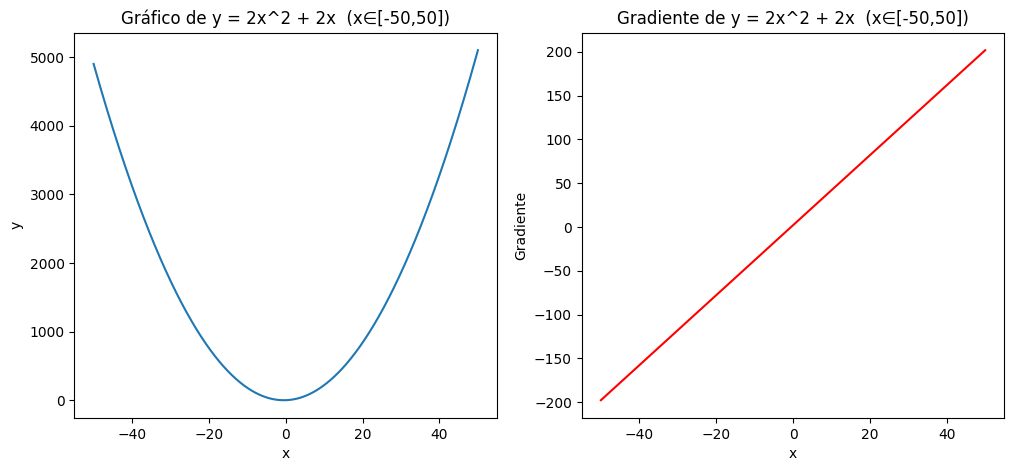

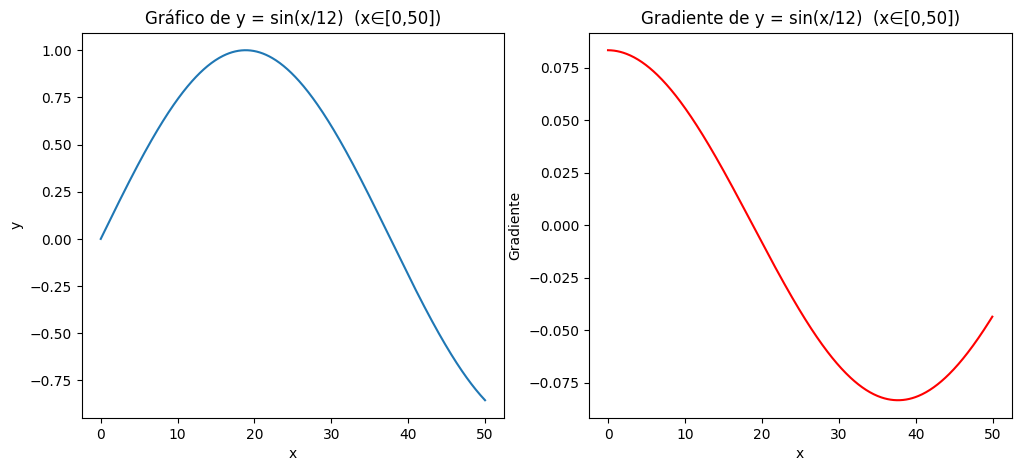


=== [P6] Mínimos por función ===

y = x^2  (x∈[-50,50])
  y_min = 5.04871e-25 en x = 0.000 (índice 500)
  Pendiente antes  (entre x[499] y x[500]): -0.1
  Pendiente después(entre x[500] y x[501]): 0.1

y = 2x^2 + 2x  (x∈[-50,50])
  y_min = -0.5 en x = -0.500 (índice 495)
  Pendiente antes  (entre x[494] y x[495]): -0.2
  Pendiente después(entre x[495] y x[496]): 0.2

y = sin(x/12)  (x∈[0,50])
  y_min = -0.854753 en x = 50.000 (índice 500)
  Pendiente antes  (entre x[499] y x[500]): -0.0435493
  Pendiente después: N/A (mínimo en el último punto)


In [1]:
# =========================================
# Matriz bidimensional y problema de gradiente
# =========================================
import numpy as np
import matplotlib.pyplot as plt

# ---------- Problema 1 ----------
x = np.arange(-50, 50.1, 0.1)
y = 12*x + 1
print(f"[P1] x.shape={x.shape}, y.shape={y.shape}")

# ---------- Problema 2 ----------
xy_array = np.vstack((x, y)).T
print(f"[P2] xy_array.shape={xy_array.shape}  (esperado: (1001, 2))")

# ---------- Problema 3 ----------
delta_y = y[1:] - y[:-1]
delta_x = x[1:] - x[:-1]
gradient = delta_y / delta_x
print(f"[P3] gradient.shape={gradient.shape}  (esperado: (1000,))  ejemplo grad={gradient[0]}")

# ---------- Problema 4 ----------
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, y)
plt.title("y = 12x + 1")
plt.xlabel("x")
plt.ylabel("y")

plt.subplot(1, 2, 2)
plt.plot(x[:-1], gradient, color='red')
plt.title("Gradiente vs x")
plt.xlabel("x")
plt.ylabel("Gradiente")
plt.show()
# ---------- Problema 5 ----------

def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    """
    Calcula el gradiente (diferencia hacia adelante) de y=f(x).
    Devuelve:
      - array_xy: ndarray de forma (n, 2) con columnas [x, y]
      - gradient: ndarray de forma (n-1,) con gradiente entre x[i] y x[i+1]
    """
    x_array = np.arange(*x_range)     # start, stop, step
    y_array = function(x_array)
    grad = (y_array[1:] - y_array[:-1]) / (x_array[1:] - x_array[:-1])
    array_xy = np.vstack((x_array, y_array)).T
    return array_xy, grad

# Funciones
def function1(x):             # y = x^2, rango: [-50,50]
    return x**2

def function2(x):             # y = 2x^2 + 2x, rango: [-50,50]
    return 2*x**2 + 2*x

def function3(x):             # y = sin(x/12), rango: [0,50]
    return np.sin(x/12)

# Calcular y graficar para cada función con su rango correspondiente
funcs     = [function1, function2, function3]
titles    = ["y = x^2  (x∈[-50,50])", "y = 2x^2 + 2x  (x∈[-50,50])", "y = sin(x/12)  (x∈[0,50])"]
x_ranges  = [(-50, 50.1, 0.1), (-50, 50.1, 0.1), (0, 50.1, 0.1)]

all_results = []
for title, f, xr in zip(titles, funcs, x_ranges):
    xy_arr, grad_arr = compute_gradient(f, x_range=xr)
    all_results.append((title, xy_arr, grad_arr))

    # Gráficos como en P4
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(xy_arr[:,0], xy_arr[:,1])
    plt.title(f"Gráfico de {title}")
    plt.xlabel("x"); plt.ylabel("y")

    plt.subplot(1,2,2)
    plt.plot(xy_arr[:-1,0], grad_arr, color='red')
    plt.title(f"Gradiente de {title}")
    plt.xlabel("x"); plt.ylabel("Gradiente")
    plt.show()
# ---------- Problema 6 ----------
# Mínimos con min/argmin y pendientes antes/después

def min_with_slopes(xy_arr, grad_arr):
    """
    Dado (x, y) y el gradiente entre puntos consecutivos,
    devuelve el mínimo de y, el x correspondiente,
    y las pendientes inmediatamente antes y después del mínimo (si existen).
    """
    x_vals = xy_arr[:,0]
    y_vals = xy_arr[:,1]
    i_min = y_vals.argmin()
    y_min = y_vals[i_min]
    x_at_min = x_vals[i_min]

    # El gradiente grad_arr[i] es la pendiente entre x[i] y x[i+1]
    slope_before  = grad_arr[i_min-1] if i_min-1 >= 0 else None
    slope_after   = grad_arr[i_min]   if i_min   < len(grad_arr) else None
    return x_at_min, y_min, i_min, slope_before, slope_after

print("\n=== [P6] Mínimos por función ===")
for (title, xy_arr, grad_arr) in all_results:
    x_at_min, y_min, i_min, m_before, m_after = min_with_slopes(xy_arr, grad_arr)
    print(f"\n{title}")
    print(f"  y_min = {y_min:.6g} en x = {x_at_min:.3f} (índice {i_min})")
    # Imprimir pendiente antes/después si existen
    if m_before is not None:
        print(f"  Pendiente antes  (entre x[{i_min-1}] y x[{i_min}]): {m_before:.6g}")
    else:
        print( "  Pendiente antes  : N/A (mínimo en el primer punto)")
    if m_after is not None:
        print(f"  Pendiente después(entre x[{i_min}] y x[{i_min+1}]): {m_after:.6g}")
    else:
        print( "  Pendiente después: N/A (mínimo en el último punto)")
